# Homework on Statistical Learning Theory

<b>Deadline:</b> 24.12.2018, 9 a.m. (there would be no soft deadline)

<b>How to hang in?</b> You need to put your Jupyter Notebook to GitHub repo and send link in Telegram to <b>@CroCode</b>

Dmitry Donetskov

# Block №1. Combinatorics and Probability Theory

You can use LaTeX expressions in order to provide formulas: https://en.wikibooks.org/wiki/LaTeX

## Task 1

1) In how many ways can the letters of the word PROBABILITY be rearranged such that all I’s and P’s appear in the middle?

<b>Total:</b> 1 point

### Solution

The word is of the length 11 with the 9 unique letters $S = \{A,B,I,L,O,P,R,T,Y\}$. The complete set is divided into two: $S_1 = S \setminus \{I,P\} = \{A,B,L,O,R,T,Y\}$ and $S_2 = S \setminus S_1 = \{I,P\}$. There are two instances of $B$ and $I$ therefore they can appear twice in different places of the arrangements. It looks like a task with a limited number of replacements for certain elements and no replacements for the rest of elements. To make the task simplier, I consider the repeating elements as four distinct elements: $B_1$, $B_2$, $I_1$, $I_2$, calculate the number of arrangements and then apply the deduplication factor. Therefore, the sets to calcuate the number of arrangements over them are $Q_1 = \{A,B_1,B_2L,O,R,T,Y\}$ and $Q_2 = \{I_1,I_2,P\}$.

Let's define the *middle* as the positions 5-7 because there are three letters in total to occupy it (two 'I's one 'P' i.e. with the elements from $Q_2$). All the letters in a complete arrangement can be separated into three groups:

| Positions | Characteristics                                      | Number of Arrangments 
|-----------|:-----------------------------------------------------|-----------------------
| 1 - 4     | arrangements of any available letter from $Q_1$      | $A^4_8$
| 5 - 7     | arrangements of any available letter from $Q_2$      | $A^3_3$
| 8 - 11    | arrangements of any of four letters left from $Q_1$  | $A^4_4$

where $A^k_n = \frac{n!}{(n-k)!}$.

So, the total number of arrangements (with the duplicates!) is $A_8^4 \times A^3_3 \times A^4_4 $. Now, to cater for the duplicates, we need to divide that number by $2 \times 2 = 4$, to remove the duplicates from the positions 1-4, 7-11, and the positions 5-7.

The final answer is $\frac{A_8^4 \times A^3_3 \times A^4_4}{2 \times 2} = 60480$.

Below, there is some code to support the calculations.

In [1]:
word = 'PROBABILITY'
letters = set(word)

print('The length: %d, # unique letters: %d' % (len(word), len(letters)))
print('The frequency of letters')
for letter in sorted(list(letters)):
    print('%s - %d' % (letter, word.count(letter)))

arr_no = (8 * 7 * 6 * 5) * 3 * 2 * 1 * (4 * 3 * 2 * 1) / 4
print('The number of arrangements (solution 1): %d' % arr_no)      

The length: 11, # unique letters: 9
The frequency of letters
A - 1
B - 2
I - 2
L - 1
O - 1
P - 1
R - 1
T - 1
Y - 1
The number of arrangements (solution 1): 60480


## Task 2

2) The probability of having defect (at least 1 defective product) in batch of 100 products is 63.2%. Find the probability of having less than 3 defective products in such a batch.

<i>Hint:</i> use idea of Poisson distribution (https://en.wikipedia.org/wiki/Poisson_distribution)

<b>Total:</b> 1.5 points

### Solution

Let's define $X$ as the number of defective products per the batch ($n=100$), $X$ is a random variable. It is known that $P\{X\ge1\} = 0.632$. 

It is required to find $P\{X<3\}$.

According to the nature of the task, I assume the distribution of X as either the Binomial distribution or the Poisson one (given $n$ is large enough, more than 15-20). Also, it can be noted that the probability of getting *no* defective product is 

$$P\{X=0\} = 1 - P\{X\ge1\} = 1 - 0.632 = 0.368$$

Below, $P\{X<3\}$ is calculated using two different approaches.

**The case of the Binomial distributon.**

Let's assume $X \sim Bin(p, n)$ where $p$ is the probability a randomly chosen product is a defective one. Then, according to the Binomial PMF and the data

$$P_{X \sim Bin(n=100,p)}\{X=0\} = C^0_{100} \times p^{0} \times (1-p)^{100} = (1-p)^{100} = 0.368 \quad \Rightarrow \quad p = 1 - \sqrt[100]{0.368} = 0.009947$$

With this exact PMF, $P\{X<3\} = \sum_{k=0}^{2} P_{X \sim Bin(n=100,p=0.009947)}\{X=k\} = 0.921595$.

**The case of the Poisson distributon.**

Let's assume $X \sim Poisson(\lambda)$, then according to the Poisson PMF and the data, for $k = 0$

$$P_{X \sim Poisson(\lambda)}\{X=0\} = e^{-\lambda}\frac{\lambda^0}{0!} = e^{-\lambda} = 0.368 \quad \Rightarrow \quad \lambda = -\ln(0.368) = 0.999672$$

With this exact PMF, $P\{X<3\} = \sum_{k=0}^{2} P_{X \sim Poisson(\lambda=0.999672)}\{X=k\} = 0.919759$.

There is the code below which was used to calculate the probabilities

In [2]:
import math
import scipy.stats as stats

n = 100
p0 = 1-0.632

In [3]:
#
# The exact solution with the Binomial distribution
#

print('The Binomial distribution case')

# let's find the probability of getting a good product, it's required for the Binomial distribution
p = 1 - p0 ** (1/n)
print('The probability of getting a defective / non-defective product is %f / %f' % (p, 1-p))

# define a Binomial random variable
Xb = stats.binom(n, p)
print('P{X >= 1} = %f' % sum([Xb.pmf(k) for k in range(1, n+1)]))
print('P{X <  3} = %f' % sum([Xb.pmf(k) for k in range(3)]))

print()

The Binomial distribution case
The probability of getting a defective / non-defective product is 0.009947 / 0.990053
P{X >= 1} = 0.632000
P{X <  3} = 0.921595



In [4]:
#
# The approximate solution with the Binomial distribution
#

print('The Poisson distribution case')

lam = -math.log(p0)
print('The lambda coeff. for the Possion distribution is %f' % lam)

# define a Poisson random variable
Xp = stats.poisson(lam)
print('P{X >= 1} = %f' % sum([Xp.pmf(k) for k in range(1, n+1)]))
print('P{X <  3} = %f' % sum([Xp.pmf(k) for k in range(3)]))

The Poisson distribution case
The lambda coeff. for the Possion distribution is 0.999672
P{X >= 1} = 0.632000
P{X <  3} = 0.919759


# Block №2. Data Structures and Algorithms

<b><i>NB!</i></b> Here you need to provide solution having minimal memory and runtime complexity in terms of Big O notation.

## Task 3

3) Suggest an algorithm that resets all elements in the column <i>i</i> and the row <i>j</i> of the matrix M to zeros if the element in the <i>(i, j)</i> cell is zero. Provide solution having minimal memory and runtime complexity in terms of Big O notation.

<b>Input:</b> matrix M

<b>Output:</b> modified according to condition matrix M

<b>Total:</b> 2 points

### Solution

One can note that replacing all values of a column and a row with zero makes inspecting any elements in that column and the row any further unnecessary as they are already zero. Let's use this handy property to build an algorythm.

The algorythm scans through the matrix (by rows and by columns) and indicates those rows and columns which need to be set to zero. The indicators are kept as zero values in the first row and the first column of the matrix in the following manner:

- the zero value in the first column means that this particular row needs to be replaced with zero,
- the zero value in the first row except (0,0) means that this particular column needs to be replaced with zero.

There is the exceptionm for (0,0) to remove the ambiguousness (is it for the column or for the row?):

- the zero value at (0,0) is the indicator for the very first column itself,
- if it appears the first column needs to be replaced with zero's, a separate indicator (a variable) is user for it.

These indicators are used after the scan stage is completed to zero the necessary columns and rows.

The code below defines the MyMatrix class which is used to test the algorythm. The class provides methods to generate a new matrix, report basic statistics about it and replace values in it with zeros according to the rule.

In [5]:
import math
import numpy as np
import random

class MyMatrix():
    
    """
    Class to handle the matrix problem.
    
    The matrix handles only natural numbers by default.
            
    Attributes
    ----------
    nrows : int
        Number of rows
        
    ncols : int
        Number of colums
    """
    
    def __init__(self, data=None):
        
        """
            Create an empty instance, fill it with data if given.
            
        Parameters
        ----------
        data : two dimesional array
            Data to used to initialized the matrix
        """
        
        if data == None:
            self.M = None
            self.nrows = None
            self.ncols = None
        else:        
            self.M = np.matrix(data)
            self.nrows = self.M.shape[0]
            self.ncols = self.M.shape[1]           
    
    def generate(self, rows=10, cols=10, min_value=10, max_value=99, zeros_pct=10):
        
        """
        Generate a new matrix with random elements
        
        Parameters
        -----------
        rows : int, optional (default=10)
            Number of rows

        cols : int, optional (default=10)
            Number of columns

        min_value : int, optional (default=10)
            The minimum value of an element, it's limited by a two-digit number by default to make the output be prettier

        max_value : int, optional (default=99)
            The maximum value of an element, it's limited by a two-digit number by default to make the output be prettier

        zeros_pct : int, optional (default=10)
            The percentage of zero elements (it's approximate)
        """
        self.nrows = rows
        self.ncols = cols

        # generating the matrix, without any zero elements yet
        self.M = np.matrix(np.reshape(random.choices(population=range(min_value, max_value), k=self.nrows*self.ncols), 
                                      (self.nrows, self.ncols)))
        
        # putting some zero elements into M
        for k in range(math.ceil(zeros_pct*self.nrows*self.ncols/100)):
            i = random.randint(1, self.nrows) - 1
            j = random.randint(1, self.ncols) - 1
            self.M[i,j] = 0
        
    def __repr__(self):

        print('The matrix of the shape %s is' % str(self.M.shape))
        print()
        for i in range(self.nrows):
            for j in range(self.ncols):
                if self.M[i,j] != 0:
                    print('%2d ' % self.M[i,j], end='')
                else:
                    #print('%2s ' % '\U0001D7EC', end='')
                    #print('%2s ' % '\U0001f10b', end='')
                    print('%2d ' % 0, end='')
            print()
            
        print()
        nzeros = self.nzeros()
        print('Number of zero elements: %d (%2.2f pct)' %
              (nzeros, 100*nzeros/(self.nrows*self.ncols)))
        
        return('')
       
    def nzeros(self):
        """
        Get the number of zero elements
        """
        return((self.M == 0).sum())
    
    def reset(self):
        """
        Resets all elements in the column i and the row j to zeros if (i, j) is zero.
        
        Retuns
        ------
        The new matrix
        """
        
        # number of iterations
        c = 0
        
        # scanning through the matrix, marking those rows and columns which need to be set to zero
        # the marks are left in the first row and the first column of the matrix
        # zero in the first column means that this row needs to be replaced with zero
        # zero in the first row except [0,0] means that this column needs to be replaced with zero
        
        # zero in [0,0] is used as the mark for the very first column itself
        # if it appears we need to zero the first column, a separate flag is user for it.

        zero_first_column = False
        
        self.iter = 0
        
        for i in range(self.nrows):
            
            # if the first element of the row is zero, there is no need to scan the row further, 
            # as we'll just zero the whole row and the whole columns in the end
            
            self.iter = self.iter + 1
            
            if self.M[i,0] == 0:
                zero_first_column = True
                continue
                
            for j in range(self.ncols):
                
                self.iter = self.iter + 1
                
                if self.M[i,j] == 0:
                    self.M[i,0] = 0
                    self.M[0,j] = 0

        # fill in with zero's the identified rows and columns

        for j in range(1,self.ncols):
            if self.M[0,j] == 0:
                self.M[:,j] = 0
        
        for i in range(self.nrows):
            if self.M[i,0] == 0:
                self.M[i,:] = 0
                
        if zero_first_column:
            self.M[:,0] = 0

        # self.iter = self.iter + self.nrows*self.ncols
        # print('Number of iterations is %d' % self.iter)
                
        return(self.M)

The algorytm implementation is tested below with three cases: one common and two extreme ones.

In [7]:
# Common Case
M = MyMatrix()
M.generate(rows=random.randint(8,16), cols=random.randint(8,16), zeros_pct=5)
print(M)
M.reset()
print(M)

The matrix of the shape (16, 12) is

27 41 81 31 12 11  0 12 88 26 35 27 
61 80 13 49 60 10 31 82 21 16 63 54 
70 89 81 14 51 90 44 36  0 27 84 65 
56 23 98 71 95 75 81 63 82 95 42 39 
73 45 61 82 84 54 66 17 82 47 51 91 
89  0 85 30 67 89 39  0 90 61 13 71 
14 53 80 54 37 79 23 18 94  0 83 75 
12 20 37  0 89 12 79 46 19 72 45 65 
71 87 36 53 63 69 60 12 87 22 94 81 
96 78 30 33 47 34 48 26 92 82 64 62 
 0 84 37 38 73 55 98 46 64 96 45 50 
55 11 88 35 97 59 85 56 58 51 85 54 
32 34 71 48 31 74 37 70 62 20 25 23 
59 11 41 12 80 14 24 14 58 36 90 97 
92 48 14 42 14 34 30  0 68 62 93 97 
72 44 15 30 44 28 30 34 97  0 63 28 

Number of zero elements: 9 (4.69 pct)

The matrix of the shape (16, 12) is

 0  0  0  0  0  0  0  0  0  0  0  0 
 0  0 13  0 60 10  0  0  0  0 63 54 
 0  0  0  0  0  0  0  0  0  0  0  0 
 0  0 98  0 95 75  0  0  0  0 42 39 
 0  0 61  0 84 54  0  0  0  0 51 91 
 0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0

In [6]:
# Special case #1: one column matrix

M = MyMatrix()
M.generate(rows=random.randint(10,10), cols=random.randint(1,1), zeros_pct=5)
print(M)
M.reset()
print(M)

The matrix of the shape (10, 1) is

97 
17 
56 
31 
46 
 0 
48 
95 
92 
85 

Number of zero elements: 1 (10.00 pct)

The matrix of the shape (10, 1) is

 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 

Number of zero elements: 10 (100.00 pct)



In [8]:
# Special case #2: one row matrix

M = MyMatrix()
M.generate(rows=random.randint(1,1), cols=random.randint(10,10), zeros_pct=5)
print(M)
M.reset()
print(M)

The matrix of the shape (1, 10) is

13 50 73 68 35 85  0 32 19 46 

Number of zero elements: 1 (10.00 pct)

The matrix of the shape (1, 10) is

 0  0  0  0  0  0  0  0  0  0 

Number of zero elements: 10 (100.00 pct)



#### Complexity

The memory complexity is O(1) as only one additional variable is used.

The runtime complexity is O(n\*m) as the whole matrix is scanned (though with minor optimization for the first column).

## Task 4

4) Imagine you have a square picture, each pixel of which can be black or white (you can interpret it as binary matrix). Develop an algorithm for finding the maximum sub-square consisting of only black pixels.

<b>Input:</b> binary matrix M (contains only 0-1 elements)

<b>Output:</b> <i>((a1, b1),(a2, b2))</i> where <i>(a1, b1)</i> and <i>(a2, b2)</i> stay for coordinates of upper-left and lower-right sub-square corners respectively

<b>Total:</b> 2.5 points

### Solution

There can be many sub-squares in the matrix. The plain solution would be to calculate the size of each sub-square (e.g. by iterating over all the elements of the matrix, and checking, for any specific cell (i,j), how far the square area to the right and to the bottom from  this cell is filled-in with '1', but that would call for the computing complexity as O(n*\n\*k) where k is proportional to the average size of sub-square.

If we think a bit about the approach above, it can be noted that every cell is checked multiple times... but in the same meaning, that is if a cell can help to increase a sub-square being checked at the moment. Therefore, the optimization is to do that only once in the following manner:

- create another matrix, let's name it S, it will keep the sizes of sub-squares,
- every cell in S represents the size of a sub-square which spreads to the left and to the top; in other words, every cell in S represents the bottom right corner of a sub-square and keeps its size, and that size is just one number as they are *squares*,
- initialize it with the copy of the original matrix, which essentially means we start with sub-squares of the size of a single cell,
- iterate by rows and by columns, checking the value of every cell,
- if the cell's value is 1, it potentially can help to grow a sub-square, then, considering the current cell's coordinates as (i,j), add to its value the minimum value of three neighboring cells: to the left (i,j-1), to the top (i-1,j) and by the diagonal towards the (0,0) (i-1,j-1), that'll be the size of sub-square which is represented by the cell (i,j),
- after the scan phase is over, find the largest value in S, the coordinates of its cell are (a2,b2), subtracting the largest value from (a2,b2) will provide the coordinates (a1,b1).

The code below implements the algorythm with the MySquare class. The class provides methods to generate a matrix, draw it and get coordinates for the largest sub-subsquare (the first one in case of multiple occurences).

There are tests below for various cases. Each test case can be re-run as many times as required.

In [14]:
import math
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

class MySquare():
    
    """
    Class to handle the square problem.
    
    Parameters
    ----------
    data : 2D-list, numpy ndarray or matrix
        Data to create the matrix from
    
    n : int
        Dimension of the square
        
    weights : list
        proportion of 0 to 1 when randomly filling in the matrix
    """
    
    def __init__(self, data=None, n=10, weights=[1,4]):
        
        if data is None:
            # generating the matrix, without any zero elements yet
            self.M = np.matrix(np.reshape(random.choices(population=range(0, 2), weights=weights, k=n*n), (n, n)))
        else:
            M_tmp = np.matrix(data)
            assert M_tmp.shape[0] == M_tmp.shape[1]
            # assert M.shape[0] == M.shape[1]
            self.M = M_tmp
    
    def desc(self, stats=True, content=False):

        """
        Prints basic statistics.
        """

        print('Dimension: %s, the number of ''0'': %d, the number of ''1'': %d.' % 
              (str(self.M.shape), (self.M == 0).sum(), (self.M == 1).sum()))
              
        if content:
              
            print()

            chars = [' ', '\u2588']

            for i in range(self.M.shape[0]):
                for j in range(self.M.shape[0]):
                    print('%1s' % chars[self.M[i,j]], end='')
                print()
    
    def draw(self):
        
        """
        Draw the matrix using matplotlib.
        """
        
        # trying to automatically adjust to the matrix size
        n = self.M.shape[0]
        
        if n < 2:
            print('The matrix is too small to be drawn, its content is %s.' % str(self.M))
            return
        
        size = 2*math.log(n)
        sns.set(rc={'figure.figsize':(size, size)})
        
        ax = sns.heatmap(self.M, center=0.4, square=True, cbar=False, cmap=sns.color_palette("ch:2.5,-.2,dark=.3"))
        #ax.set_xticklabels(labels=ax.get_xlabel(), fontdict={'verticalalignment': 'top'})
        #return(ax)
    
    def get_max_subsquare(self):
        
        """
        Find and return the first largest sub-square. It returns -1 for all coordinates if there is no solution.
        """
        # the matrix of sub-squares' sizes
        self.S = np.copy(self.M)

        # the scanning phase, calculating the sub-squares' sizes
        for i in range(1, self.M.shape[0]):
            for j in range(1, self.M.shape[1]):
                if self.S[i,j]:
                    self.S[i,j] += min(self.S[i,j-1], self.S[i-1,j-1], self.S[i-1,j])
                 
        # getting the first max value and calculating coordinates for it.
        k = self.S.argmax()
        a2 = int(k / self.M.shape[1]) 
        b2 = k % self.M.shape[0]
        Sk = self.S[a2, b2]
        
        if Sk == 0:
            print('There is no solution.')
            return((-1,-1),(-1,-1))
        
        a1 = a2 - Sk + 1
        b1 = b2 - Sk + 1
        
        print('The subsquare of the dimension %dx%d has the coordinates: (%d,%d)-(%d,%d)' %
            (Sk, Sk, a1, b1, a2, b2))
        
        return(((a1, b1), (a2, b2)))        

The subsquare of the dimension 4x4 has the coordinates: (0,8)-(3,11)


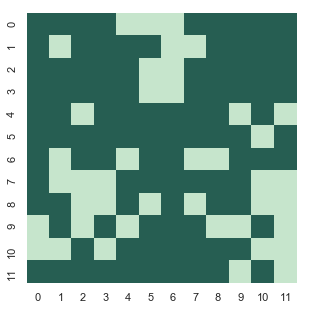

In [19]:
# Common case. It can be re-run if required.

S = MySquare(n=12, weights=[1,2])
# S.desc()
S.draw()
(a1, b1), (a2, b2) = S.get_max_subsquare()

In [15]:
print('Special case #1: a single cell ''0'' matrix')
S = MySquare(data=[[0]])
S.draw()
(a1, b1), (a2, b2) = S.get_max_subsquare()

Special case #1: a single cell 0 matrix
The matrix is too small to be drawn, its content is [[0]].
There is no solution.


In [16]:
print('Special case #2: a single cell ''1'' matrix')
S = MySquare(data=[[1]])
S.draw()
(a1, b1), (a2, b2) = S.get_max_subsquare()

Special case #2: a single cell 1 matrix
The matrix is too small to be drawn, its content is [[1]].
The subsquare of the dimension 1x1 has the coordinates: (0,0)-(0,0)


Special case #3: all zeros matrix
There is no solution.


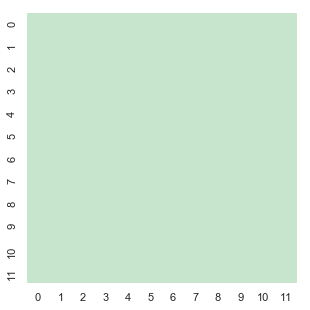

In [17]:
print('Special case #3: all zero''s matrix')
S = MySquare(n=12, weights=[1,0])
S.draw()
(a1, b1), (a2, b2) = S.get_max_subsquare()

Special case #4: all ones matrix
The subsquare of the dimension 12x12 has the coordinates: (0,0)-(11,11)


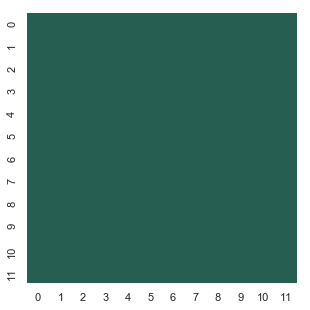

In [18]:
print('Special case #4: all one''s matrix')
S = MySquare(n=12, weights=[0,1])
S.draw()
(a1, b1), (a2, b2) = S.get_max_subsquare()

#### Complexity

Memory complexity: O(n^2) as another matrix of the same dimension to calculate the squares'' sizes is created.

Runtime complexity: O(n^2 + n) as all elements of the matrix are scanned, then there is the search for the max element

## Task 5

5) Imagine series of integer numbers having only 3, 5 or 7 of some power in their factorization (i.e. 1, 3, 5, 7, 9, 15 etc.). Given k you're asked to return k-th number in this series.

<i>Helpful link</i>: https://en.wikipedia.org/wiki/Fundamental_theorem_of_arithmetic

<b>Input:</b> integer number k

<b>Output:</b> k-th number of series

<b>Total:</b> 3 points

### Solution

The series is $x: x = 3^i \times 5^j \times 7^k, \forall \ i \in N, j \in N, k \in N$.

A brute-force approach would be iterating through i, j, k (limited by a reasonable guess) and just calculate $x$ according to the formula. The elements won't be in order but the whole unordered series can be ordered in the end. This approach is implemented in the **get_k1()** procedure below.

Another brute-force approach can be going through all numbers from 1 to k and checking if it's divisible by only 3, 5 or 7. This approach is implemented in the **get_k3()** procedure below.

After having thought for a while on the problem and reading about it in the book of Edsger Dijkstra ([the link](http://web.cecs.pdx.edu/~cs410aph/Lectures/Smalltalk%20II/Dijkstra%20on%20Hamming%27s%20Problem.pdf), an economical approach became visible. Any next number in the series is the product of some previous number and one of the prime numbers. So for any next number there are only three choices as in multiplying by one of the primes, and it is just required to correctly select the next candidate. As the series needs to be ordered, the next choice is the minimal value out of three products produced by the prime numbers in some powers. The power associated with the prime number used at the current step is increased after that to update the list of candidates. This approach is implemented in the **get_k5()** procedure.

The code below defines all three procedure and provides some tests for them.

In [14]:
import math

def get_k1(k, verbose=False):
    
    s = []

    p = math.ceil(math.pow(k, 1/3)) + 1
    
    for n3, n5, n7 in [(n3, n5, n7) for n3 in range(p*3) for n5 in range(p*2) for n7 in range(p)]:
        x = 3**n3 * 5**n5 * 7**n7
        s.append(x)
        if verbose:
            print('%2d %2d %2d: %7d' % (n3, n5, n7, x))
        
    s.sort()
    
    if verbose:
        print('The series'' length: %d' % len(s))
    
    return(s[k])

In [17]:
def is_valid(x, factors):
    
    """
    Verify if x is the product of the given factors (to some powers)
    """
    
    if x == 1:
        return(True)
    
    for factor in factors:
        if x % factor == 0:
            return(is_valid(x/factor, factors))
        
    return(False)

def get_k3(k, factors=(3, 5, 7), verbose=False):
    
    s = [1]
    
    n = 1    # the length of sequence built so far
    x = 2    # the next number to try
    
    while (n <= k):

        if is_valid(x, factors=factors):
            s.append(x)
            n = n + 1
            
        x = x + 1

    return(s[k])

In [18]:
def get_k5(k, verbose=False):
    
    # the factors
    factors = (3, 5, 7)
    factors_no = len(factors)
    
    # the current values of factors
    f = list(factors)

    # the current powers for factors
    p = [0] * factors_no

    s = [1] * (k + 1)
    
    if verbose:
        print('%3s: %2d %2d %2d    %5s %5s %5s   => %-32s' % 
              ('n', factors[2], factors[1], factors[0], 'f[2]', 'f[1]', 'f[0]', 'The next element'))
        print('-' * 80)
        print('%3d: %2d %2d %2d    %5d %5d %5d   => %-32s' % (0, p[2], p[1], p[0], f[2], f[1], f[0], s))        
        
    for n in range(1, (k+1)):
        
        # the minimum of the factors is the next element
        s[n] = min(f)
        
        for fi in range(factors_no):
            if s[n] == f[fi]:
                p[fi] = p[fi] + 1
                f[fi] = factors[fi] * s[p[fi]]

        if verbose:
            print('%3d: %2d %2d %2d    %5d %5d %5d   => %-32s' % (n, p[2], p[1], p[0], f[2], f[1], f[0], s))
        
    return(s[-1])

Testing that all three procedures produce equal results

In [19]:
for k in list(range(10)) + list(range(100, 110)):
    ans1 = get_k1(k)
    ans3 = get_k3(k)
    ans5 = get_k5(k)
    print('%3d:      %7d %7d %7d' % (k, ans1, ans3, ans5))

  0:            1       1       1
  1:            3       3       3
  2:            5       5       5
  3:            7       7       7
  4:            9       9       9
  5:           15      15      15
  6:           21      21      21
  7:           25      25      25
  8:           27      27      27
  9:           35      35      35
100:        35721   35721   35721
101:        36015   36015   36015
102:        39375   39375   39375
103:        42525   42525   42525
104:        42875   42875   42875
105:        45927   45927   45927
106:        46305   46305   46305
107:        46875   46875   46875
108:        50421   50421   50421
109:        50625   50625   50625


Getting timing for some reasonable number. Attention! the get_k3() procedure is sub-optimal, avoid testing it for a large number.

In [20]:
%timeit get_k1(100)

1.91 ms ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
%timeit get_k3(100)

28.4 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
%timeit get_k5(100)

133 µs ± 693 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### Complexity

| Version | Memory complexity  | Computing complexity
|---------|:--------------- ---|:----------------------
| get_k1  | O(n\*m)            | O(n\*m + n*\m\*log (n*\m), m - a coefficient proportional to the overhead of generating extra numbers
| get_k3  | O(n)               | O(n^m), in the power of some m because of the recursion, it's a very slow for large numbers
| get_k5  | O(n)               | O(n)